In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
df = pd.read_csv('~/Downloads/domain_properties.csv')

In [14]:
year_2021 = np.array([date[-2:] == '21' for date in df['date_sold']])
reasonable_price = np.array([price < 10e6 for price in df['price']])
df21 = df[year_2021*reasonable_price]


Text(0.5, 1.0, 'House Prices in 2021')

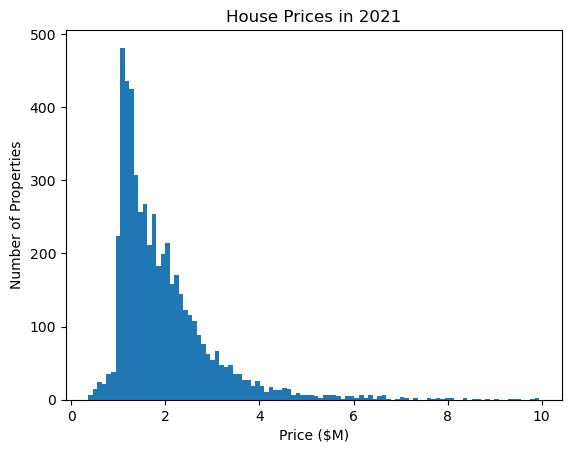

In [18]:
plt.hist(df21['price']/1e6, bins=100);
plt.xlabel('Price ($M)')
plt.ylabel('Number of Properties')
plt.title('House Prices in 2021')

Text(0, 0.5, 'Fraction of Properties')

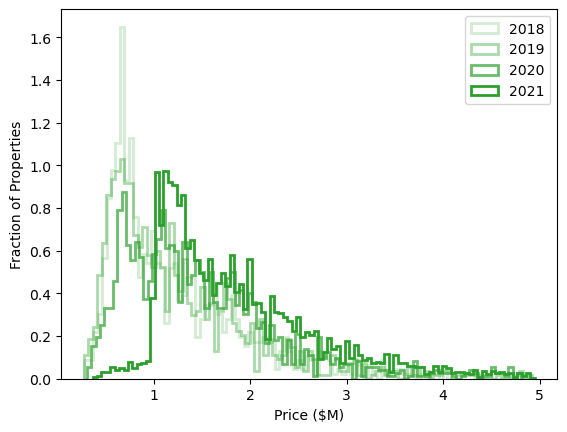

In [55]:
mean_prices = []
std_prices = []
percentile_25 = []
percentile_75 = []

for j, year in enumerate(['18', '19', '20', '21']):
    year_ = np.array([date[-2:] == year for date in df['date_sold']])
    reasonable_price = np.array([price < 5e6 for price in df['price']])
    df_ = df[year_*reasonable_price]
    mean_prices.append(np.mean(df_['price']))
    std_prices.append(np.std(df_['price']))
    percentile_25.append(np.percentile(df_['price'], 25))
    percentile_75.append(np.percentile(df_['price'], 75))
    plt.hist(df_['price']/1e6, bins=100, label='20'+year,density=True, histtype='step',lw=2,color='C2', alpha=[0.2,0.4,0.7,1.0][j]);

mean_prices = np.array(mean_prices)
std_prices = np.array(std_prices)
percentile_25 = np.array(percentile_25)
percentile_75 = np.array(percentile_75)
plt.legend()
plt.xlabel('Price ($M)')
plt.ylabel('Fraction of Properties')

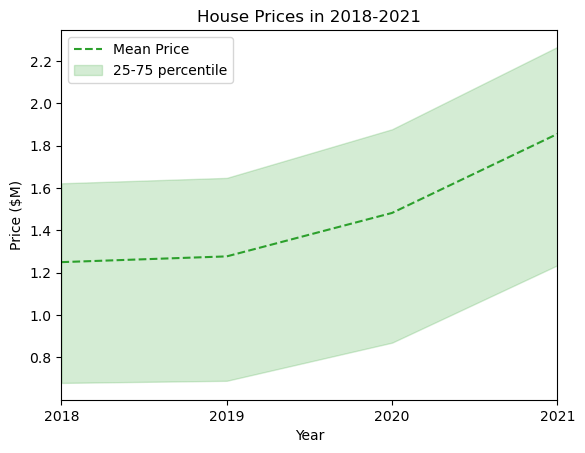

In [ ]:
plt.plot([2018, 2019, 2020, 2021], mean_prices/1e6, 'C2--',label='Mean Price')
plt.fill_between([2018, 2019, 2020, 2021], percentile_25/1e6, percentile_75/1e6, color='C2', alpha=0.2,label='25-75 percentile')

plt.ylabel('Price ($M)')
plt.xlabel('Year')
plt.xticks([2018, 2019, 2020, 2021])
plt.title('Sydney House Prices in 2018-2021')
plt.xlim(2018,2021)
plt.legend(loc='upper left')

In [48]:
mean_prices

[1249962.972111554, 1277081.3773913044, 1482132.377736085, 1854883.6460057748]